## Домашнее задание 1

В данном домашнем задании вы попробуете написать свою реализацию логистической регрессии.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

Для начала нам нужно реализовать основную функцию - сигмойду. Напомню, что ее формула выглядит вот так: 

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

In [3]:
def sigmoid(z):
    sigm = 1 / (1 + np.exp(-z))
    return sigm

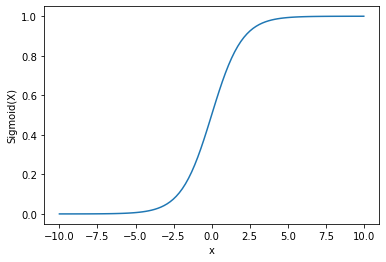

In [4]:
x = np.linspace(-10, 10, 100) 
y = sigmoid(x) 
  
plt.plot(x, y) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

Следующее, что нам понадобится - сама логистическая функция потерь:

$$-\text{ln}L(W) = -\sum^{l}_{i=1} (y_{i} \text{log}(h_{i}) + (1 - y_{i})\text{log}(1 - h_{i}).$$
$$h_{i} = \sigma(w^{T}x)$$
$$Loss(W) = \frac{1}{m}(-y\text{log}(h)-(1-y)\text{log}(1-h))$$

In [8]:
def log_loss(h, y):
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss

In [9]:
log_loss(np.full(5,1-1e-6),np.full(5,1))

1.000000500029089e-06

In [11]:
assert log_loss(np.full(5, 1-1e-6), np.full(5, 1)) < 1e-5, 'Test failed'

Далее надо реализовать шаги градиентного спуска по формулам:
$$grad = \frac{\delta Loss(W)}{\delta W} = \frac{1}{m}X^T(h-y)$$
$$W_{next} = W - learning\_rate \cdot grad$$

На каждом шаге нам надо вычислить градиент и обновить веса. Также на каждом шаге будем сохранять наш loss

In [ ]:
def gradient_descent(X, y, w, lr, num_iter):
    pass
    return w, losses

И куда без функции predict - она будет принимать параметры модели после обучения и выборку для предсказания. После получения предикта, по порогу 0.5 надо будет выбрать класс 0  или 1

In [ ]:
def predict(X, w):
    pass
    return preds

Также не забудем про add_intercept - метод, который добавит колонку из единиц к нашим данным

In [ ]:
def add_intercept(X):
    pass
    return X_with_bias

Теперь протестируем полученные фукнции

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=10, n_informative=2,
                                    n_redundant=0, n_classes=2, random_state=1)

X_with_bias = add_intercept(X)
w = np.zeros(X.shape[1] + 1)
w, losses = gradient_descent(X_with_bias, y, w, 0.01, 5_000)

preds = predict(X_with_bias, w)
score = (y == preds).mean()
print(f'Accuracy = {score}')
assert score > 0.85, 'Test failed'
plt.plot(losses)
plt.show()

Теперь реализуйте классификатор в виде класса и сравните с реализацией sklearn.  
Следуйте общепринятой нотации sklearn.

In [ ]:
class LogReg:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.threshold = 0.5
        self.verbose = verbose
        self.losses = []
    
    def add_intercept(self, X):
        pass
    
    def sigmoid(self, z):
        pass

    def log_loss(self, h, y):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict_proba(self, X):
        pass
    
    def predict(self, X):
        pass
    
    def score(self, X_test, y_test):
        pass

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [ ]:
clf = LogReg(lr=0.1, num_iter=1000)
clf.fit(X_train, y_train)

In [ ]:
preds = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(f'Accuracy = {score}')
assert score > 0.85, 'Test failed'

In [ ]:
from sklearn.linear_model import SGDClassifier, LinearRegression

In [ ]:
clf = SGDClassifier(learning_rate='constant', eta0=0.1, max_iter=1000, loss='log', penalty=None, fit_intercept=True)
clf.fit(X_train, y_train)

In [ ]:
preds = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(f'Accuracy = {score}')

### Как сдать на проверку домашнее задание

Для проверки поместите реализованный класс в питон скрипт с названием `Фамилия_И_О_LogReg.py` (ФИО латиницей) и заполните форму: https://forms.gle/2Y7k1cFKNfbzw3pA6